references:
https://www.kaggle.com/code/vinayak123tyagi/damage-propagation-modeling-for-aircraft-engine

## Descripción de los Datos del Motor Turbofán ⚙️

**CMAPSS** significa **C**ommercial **M**odular **A**ero-**P**ropulsion **S**ystem **S**imulation (Simulación de Sistema de Aero-Propulsión Modular Comercial). Es un sistema desarrollado por la **NASA** para estudiar la degradación de motores. Está codificado en **MATLAB** y **Simulink** (una caja de herramientas de MATLAB).

---

### El Motor en Estudio

El motor bajo estudio es un **motor turbofán** (un motor a reacción/jet). Un motor turbofán tiene muchos componentes. Algunos componentes importantes son: **Ventilador (Fan)**, **Compresor de Baja Presión (LPC)**, **Compresor de Alta Presión (HPC)**, **Turbina de Baja Presión (LPT)** y **Turbina de Alta Presión (HPT)**.

---
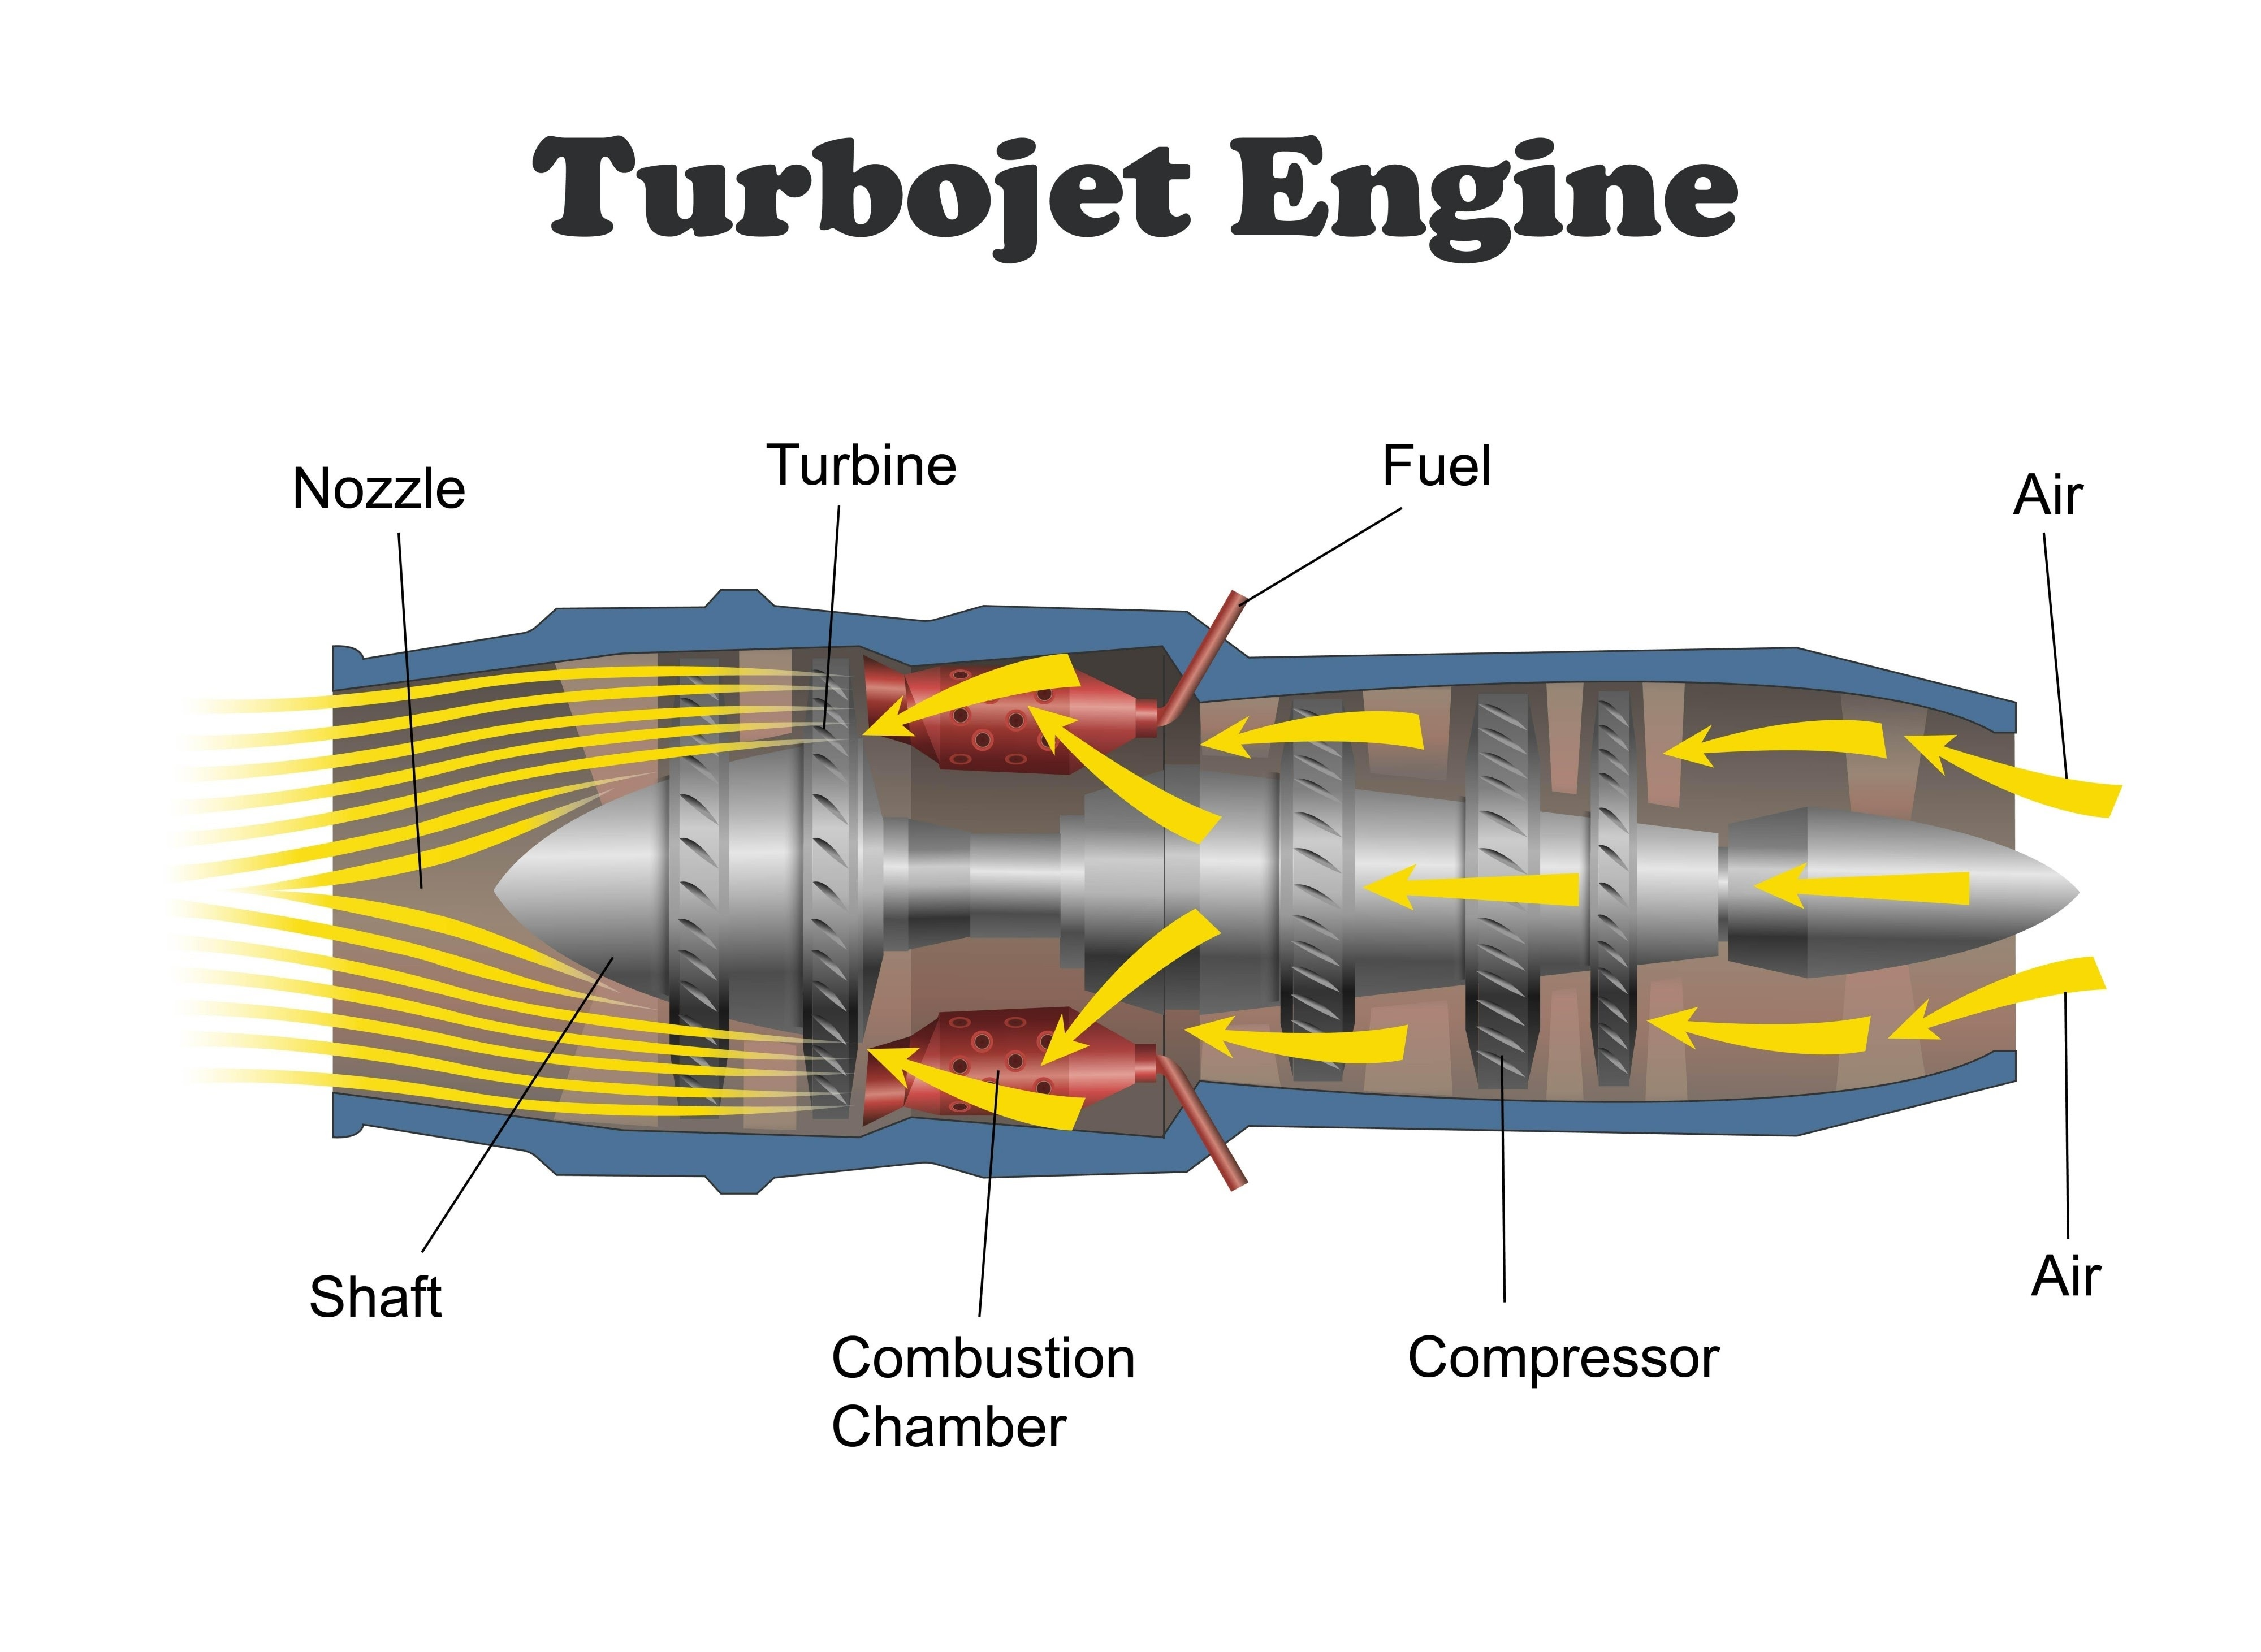
### Degradación y Mantenimiento

Durante la operación, ocurre **degradación** en cada uno de los componentes. Si el nivel de degradación en cualquier componente excede un umbral, se dice que el motor ha **fallado**. No queremos que los motores a reacción fallen en pleno vuelo. Por lo tanto, los motores a reacción se inspeccionan antes de cada despegue. Esta es una forma de **mantenimiento periódico** que no es rentable.



Sin embargo, dada la naturaleza crítica de la operación (considerando las vidas humanas involucradas), esta forma de estrategia de mantenimiento se justifica. Aun así, necesitamos un sistema que pueda darnos una **alerta temprana** si algo va a fallar.

Una alerta temprana, en muchos casos, puede ayudarnos a **prepararnos** para el problema, si no a **prevenirlo** por completo. Una alerta lo suficientemente temprana nos permitirá evitar el desastre. Pero si una alerta temprana es **demasiado conservadora**, conducirá a un gasto de dinero innecesario. Por lo tanto, el objetivo de un sistema de mantenimiento predictivo es predecir la **Vida Útil Restante (RUL)** con la mayor precisión posible, de modo que no sea ni demasiado temprano ni demasiado tarde.


#Primer Intento





In [ ]:
import pandas as pd
import os
path = "/content/drive/My Drive/Colab Notebooks/CMaps/"
os.chdir(path)
print("Current directory:", os.getcwd())

train = pd.read_csv('train_FD001.txt', sep=' ', header=None)


Current directory: /content/drive/My Drive/Colab Notebooks/CMaps


In [ ]:
# Definimos los nombres de las columnas según la descripción del dataset
column_names = [
    'unit_number', 'time_in_cycles',
    'op_setting_1', 'op_setting_2', 'op_setting_3'
] + [f'sensor_measurement_{i}' for i in range(1, 24)]

# Carga del archivo de entrenamiento
train_df = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=column_names)

# Mostrar información básica
print("Dimensiones del dataset:", train_df.shape)
print("\nColumnas disponibles:\n", train_df.columns.tolist())
train_df.head()


Dimensiones del dataset: (20631, 28)

Columnas disponibles:
 ['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20', 'sensor_measurement_21', 'sensor_measurement_22', 'sensor_measurement_23']


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-961643095.py:8: SyntaxWarning: invalid escape sequence '\s'
  train_df = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=column_names)


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np

# Cargar datos
column_names = [
    'unit_number', 'time_in_cycles',
    'op_setting_1', 'op_setting_2', 'op_setting_3'
] + [f'sensor_measurement_{i}' for i in range(1, 24)]

train_df = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=column_names)
test_df = pd.read_csv('test_FD001.txt', sep='\s+', header=None, names=column_names)
rul_df = pd.read_csv('RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

train_df.head()

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3562187568.py:10: SyntaxWarning: invalid escape sequence '\s'
  train_df = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=column_names)
/tmp/ipython-input-3562187568.py:11: SyntaxWarning: invalid escape sequence '\s'
  test_df = pd.read_csv('test_FD001.txt', sep='\s+', header=None, names=column_names)
/tmp/ipython-input-3562187568.py:12: SyntaxWarning: invalid escape sequence '\s'
  rul_df = pd.read_csv('RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [ ]:
# Calcular la vida máxima de cada motor
rul_train = train_df.groupby('unit_number')['time_in_cycles'].max().reset_index()
rul_train.columns = ['unit_number', 'max_cycle']

# Unir al dataframe original
train_df = train_df.merge(rul_train, on='unit_number', how='left')
train_df['RUL'] = train_df['max_cycle'] - train_df['time_in_cycles']
train_df.drop('max_cycle', axis=1, inplace=True)

train_df[['unit_number', 'time_in_cycles', 'RUL']].head()

,unit_number,time_in_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


In [ ]:
# Eliminar columnas que no aportan información (constantes)
const_cols = [c for c in train_df.columns if train_df[c].nunique() == 1]
print("Columnas constantes eliminadas:", const_cols)
train_df = train_df.drop(columns=const_cols)
test_df = test_df.drop(columns=const_cols)

# Eliminar columnas con NaN
nan_cols = train_df.columns[train_df.isna().any()].tolist()
print("Columnas con NaN eliminadas:", nan_cols)
train_df = train_df.drop(columns=nan_cols)
test_df = test_df.drop(columns=nan_cols)

# Eliminar filas con NaN restantes por seguridad
train_df = train_df.dropna()
test_df = test_df.dropna()


Columnas constantes eliminadas: ['op_setting_3', 'sensor_measurement_1', 'sensor_measurement_5', 'sensor_measurement_10', 'sensor_measurement_16', 'sensor_measurement_18', 'sensor_measurement_19']
Columnas con NaN eliminadas: ['sensor_measurement_22', 'sensor_measurement_23']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar columnas de sensores y settings
sensor_cols = [col for col in train_df.columns if 'sensor' in col or 'op_setting' in col]

scaler = MinMaxScaler()
train_df[sensor_cols] = scaler.fit_transform(train_df[sensor_cols])

train_df.head()


,unit_number,time_in_cycles,op_setting_1,op_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187


In [ ]:
def make_sequences(df, seq_length=30):
    X, y = [], []
    for unit in df['unit_number'].unique():
        unit_data = df[df['unit_number'] == unit]
        sensors = unit_data[sensor_cols].values
        rul = unit_data['RUL'].values
        for i in range(len(unit_data) - seq_length):
            X.append(sensors[i:i+seq_length])
            y.append(rul[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 30
X_train, y_train = make_sequences(train_df, SEQ_LEN)

print("Shape de X_train:", X_train.shape)
print("Shape de y_train:", y_train.shape)


Shape de X_train: (17631, 30, 17)
Shape de y_train: (17631,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dense(1)  # salida escalar
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 100)        │        47,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,451 (302.54 KB)

 Trainable params: 77,451 (302.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_baseline = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 9326.6953 - mae: 78.0746 - val_loss: 10648.2461 - val_mae: 79.6483
Epoch 2/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 6323.6611 - mae: 62.1136 - val_loss: 8315.9590 - val_mae: 69.5493
Epoch 3/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 4767.9902 - mae: 53.8152 - val_loss: 6905.9727 - val_mae: 63.8027
Epoch 4/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3968.1699 - mae: 49.9374 - val_loss: 6117.3418 - val_mae: 60.8715
Epoch 5/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3590.5435 - mae: 48.2210 - val_loss: 5712.0400 - val_mae: 59.5552
Epoch 6/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 3451.0261 - mae: 47.8122 - val_loss: 5517.4512 - val_mae: 59.0249
Epoch 7/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3400.6882 - mae: 47.7307 - val_loss: 5433.9014 - val_mae: 58.8380
Epoch 8/20
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3391.0022 - mae: 47.7492 - val_loss: 5400.0376 - val_ma

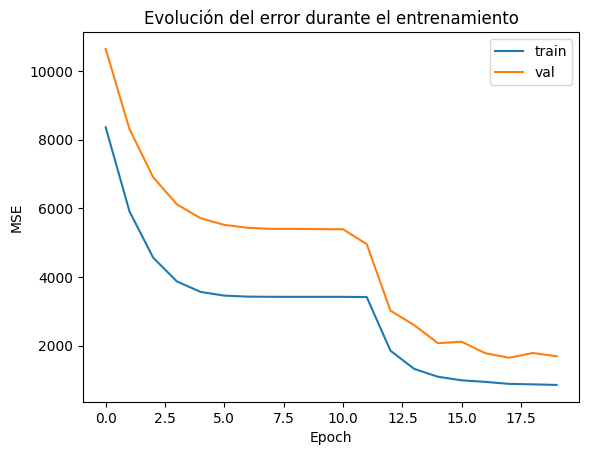


Final Training Loss (MSE): 851.8286743164062
Final Training MAE: 19.624588012695312
Final Validation Loss (MSE): 1688.29052734375
Final Validation MAE: 27.113550186157227


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_baseline.history['loss'], label='train')
plt.plot(history_baseline.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Evolución del error durante el entrenamiento')
plt.show()

# Print final metrics
print("\nFinal Training Loss (MSE):", history_baseline.history['loss'][-1])
print("Final Training MAE:", history_baseline.history['mae'][-1])
print("Final Validation Loss (MSE):", history_baseline.history['val_loss'][-1])
print("Final Validation MAE:", history_baseline.history['val_mae'][-1])

# Mejorando los datos



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fd_001_train = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/proyecto DL/DATOS/train_FD001.txt",sep=" ",header=None)
fd_001_test = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/proyecto DL/DATOS/test_FD001.txt",sep=" ",header=None)

In [ ]:
fd_001_train.describe()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [ ]:
fd_001_train.drop(columns=[26,27],inplace=True)
fd_001_test.drop(columns=[26,27],inplace=True)

In [ ]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

fd_001_train.columns = columns
fd_001_test.columns = columns

fd_001_train

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


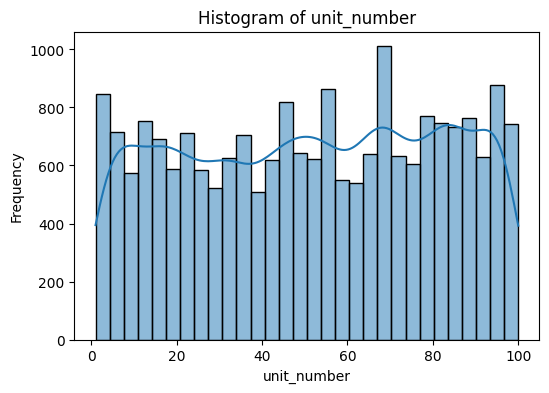

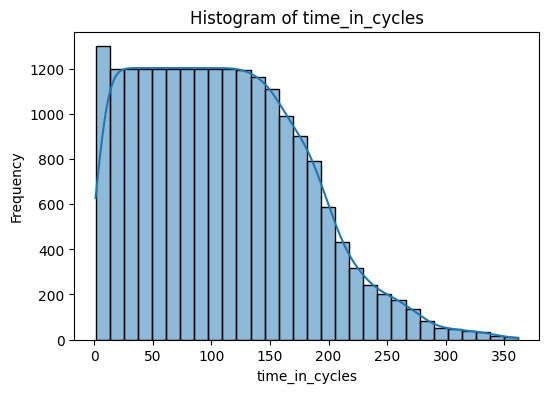

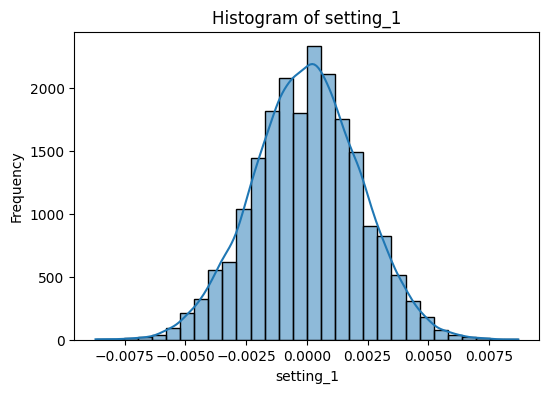

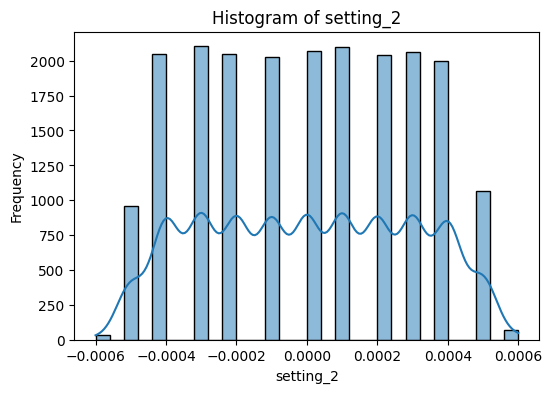

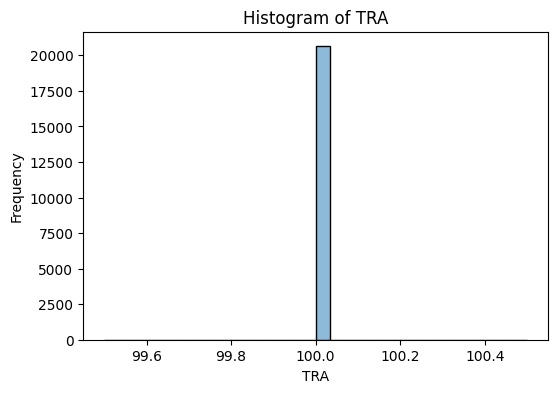

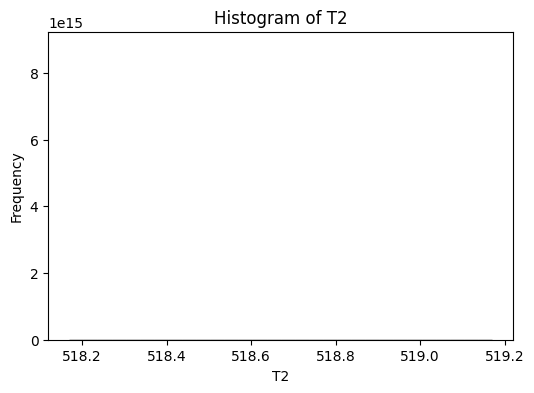

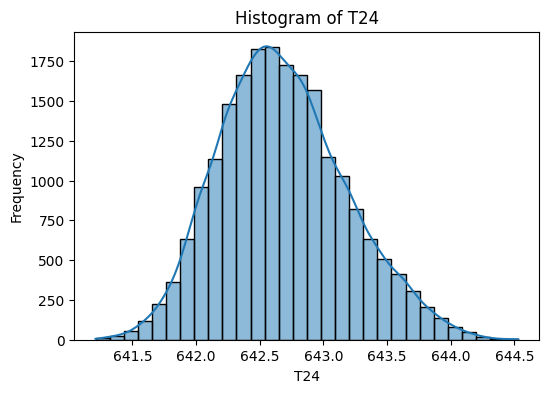

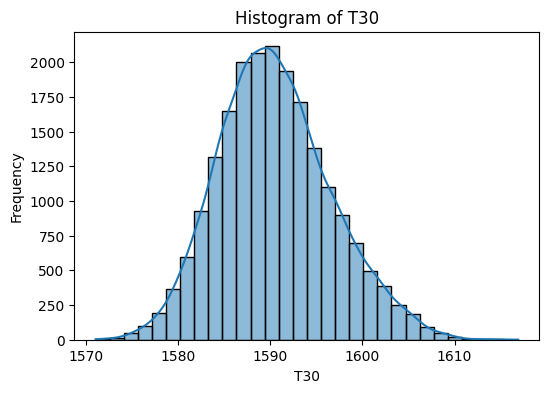

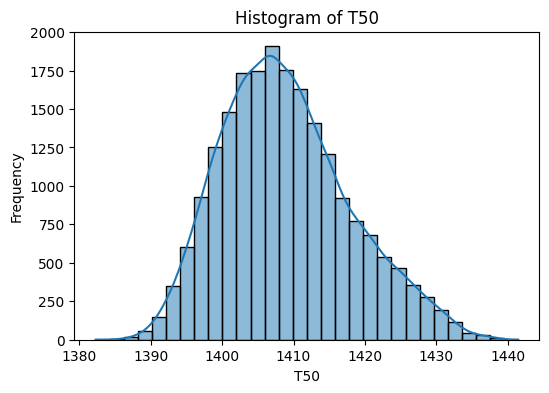

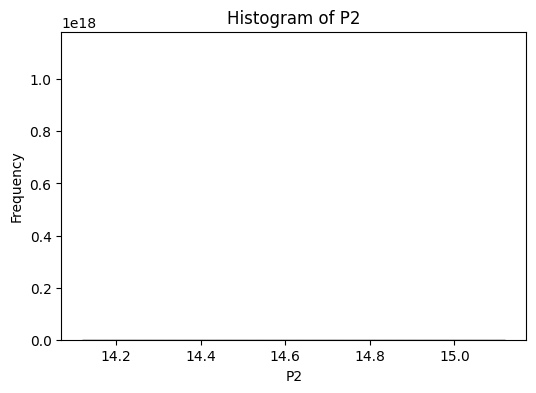

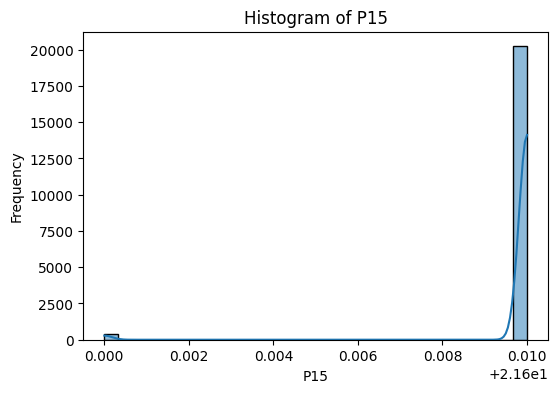

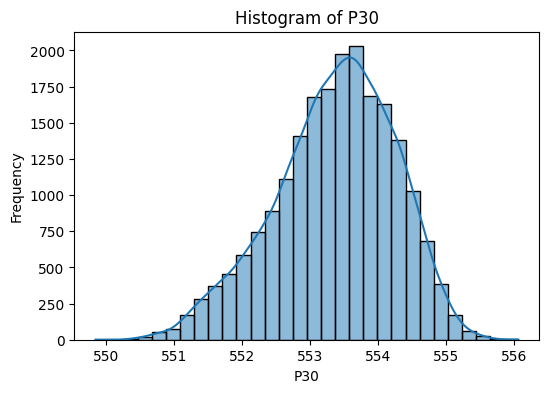

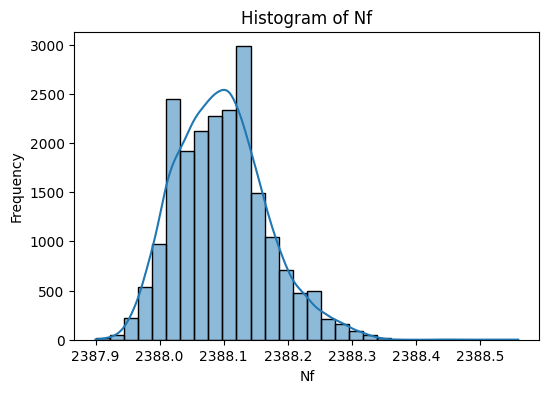

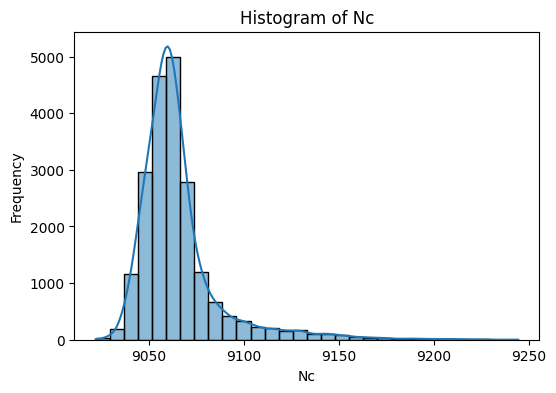

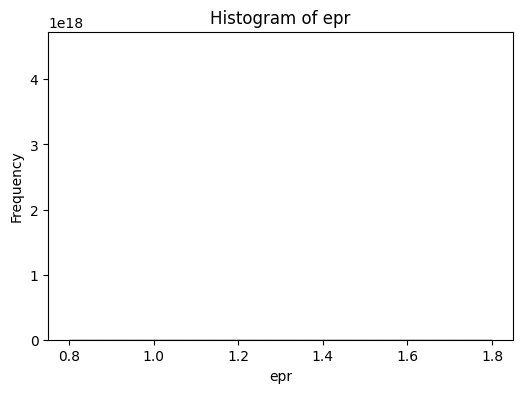

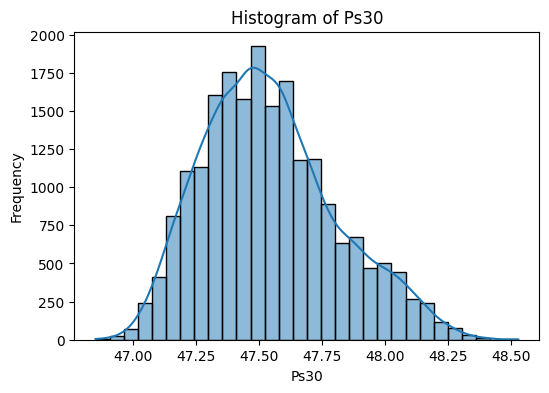

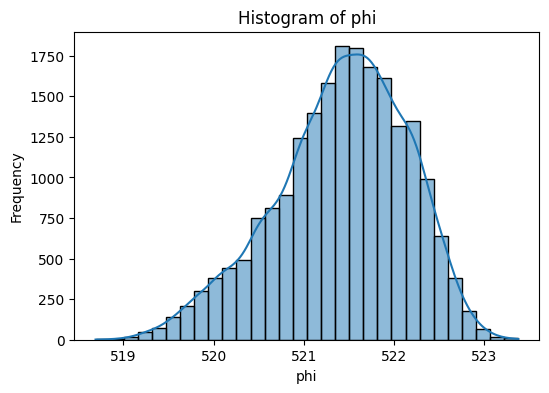

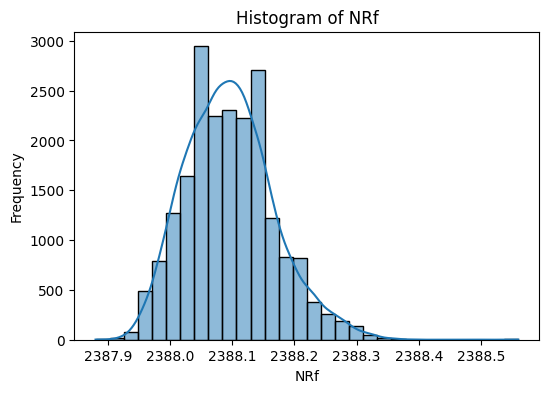

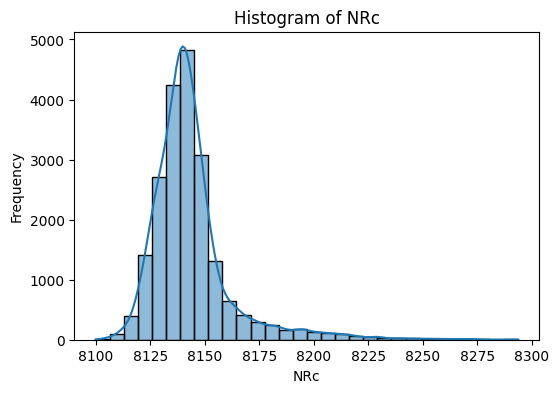

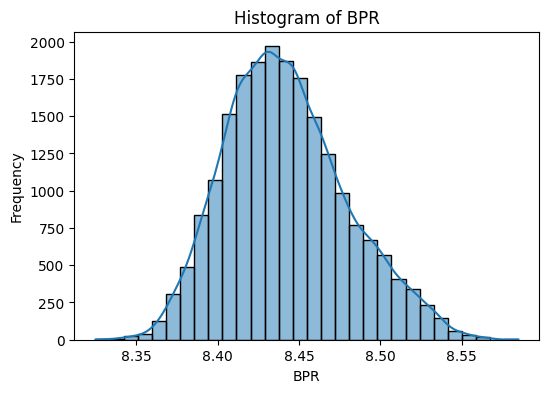

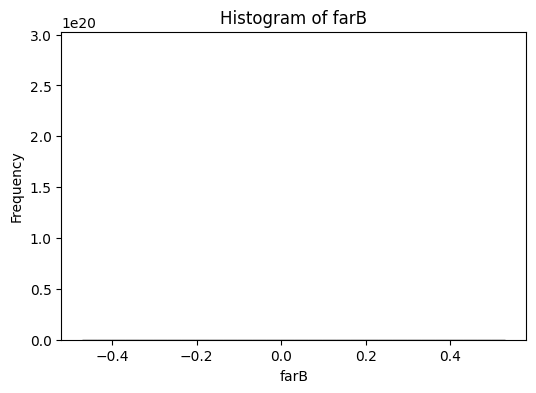

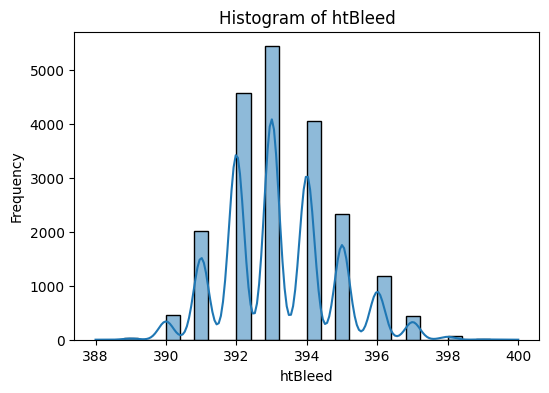

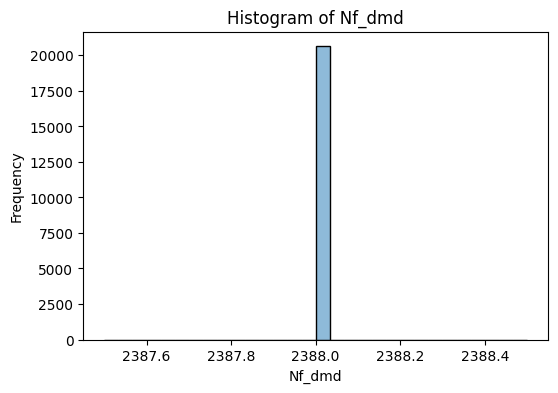

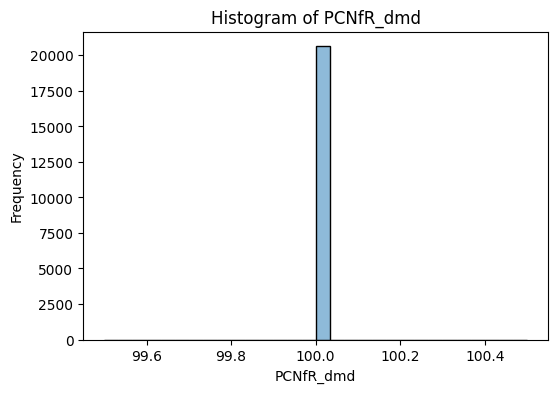

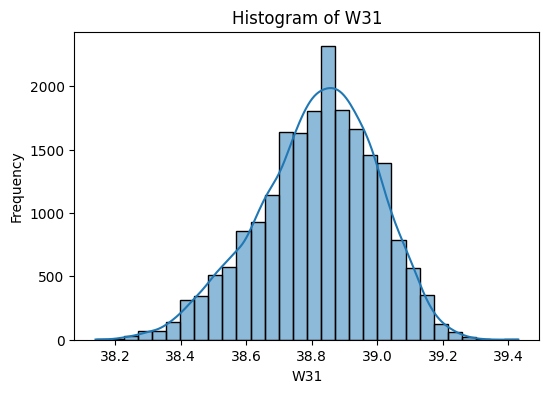

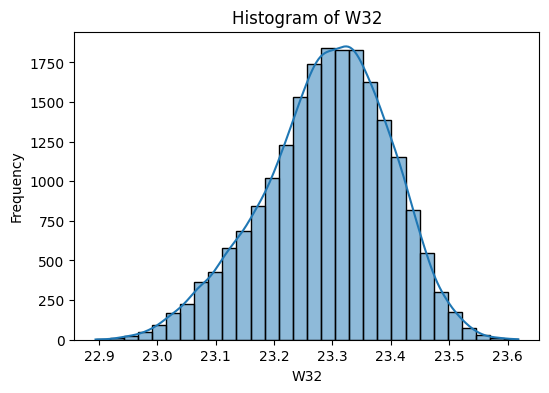

In [ ]:
# Plot histograms for each column
for col in fd_001_train.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(fd_001_train[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#delete columns with constant values ​​that do not carry information about the state of the unit
fd_001_train.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)

In [ ]:
fd_001_train['life_ratio'] = fd_001_train['time_in_cycles'] / fd_001_train.groupby('unit_number')['time_in_cycles'].transform('max')
fd_001_train

,unit_number,time_in_cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,life_ratio
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0.005208
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.010417
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0.015625
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0.020833
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,0.980000
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,0.985000
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,0.990000
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,0.995000


In [ ]:
fd_001_train[fd_001_train['unit_number'] == 2]


,unit_number,time_in_cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,life_ratio
192,2,1,-0.0018,0.0006,641.89,1583.84,1391.28,21.60,554.53,2388.01,9054.72,46.93,522.33,2388.06,8137.72,8.3905,391,38.94,23.4585,0.003484
193,2,2,0.0043,-0.0003,641.82,1587.05,1393.13,21.61,554.77,2387.98,9051.31,47.24,522.70,2387.98,8131.09,8.4167,392,39.06,23.4085,0.006969
194,2,3,0.0018,0.0003,641.55,1588.32,1398.96,21.60,555.14,2388.04,9054.24,47.22,522.58,2387.99,8140.58,8.3802,391,39.11,23.4250,0.010453
195,2,4,0.0035,-0.0004,641.68,1584.15,1396.08,21.61,554.25,2387.98,9058.01,47.10,522.49,2387.93,8140.44,8.4018,391,39.13,23.5027,0.013937
196,2,5,0.0005,0.0004,641.73,1579.03,1402.52,21.60,555.12,2388.03,9058.15,47.25,522.27,2387.94,8136.67,8.3867,390,39.18,23.4234,0.017422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2,283,0.0046,0.0002,643.78,1602.03,1429.67,21.61,551.46,2388.16,9084.13,48.21,520.07,2388.20,8174.85,8.5199,398,38.42,23.0358,0.986063
475,2,284,-0.0006,0.0001,643.91,1601.35,1430.04,21.61,551.96,2388.22,9089.87,48.18,519.95,2388.21,8166.83,8.5291,395,38.23,23.1196,0.989547
476,2,285,-0.0007,0.0004,643.67,1596.84,1431.17,21.61,550.85,2388.20,9098.67,48.27,519.91,2388.22,8164.83,8.5242,396,38.39,23.1155,0.993031
477,2,286,-0.0010,-0.0003,643.44,1603.63,1429.57,21.61,551.61,2388.18,9102.01,48.14,519.51,2388.22,8169.97,8.4932,395,38.33,23.0169,0.996516


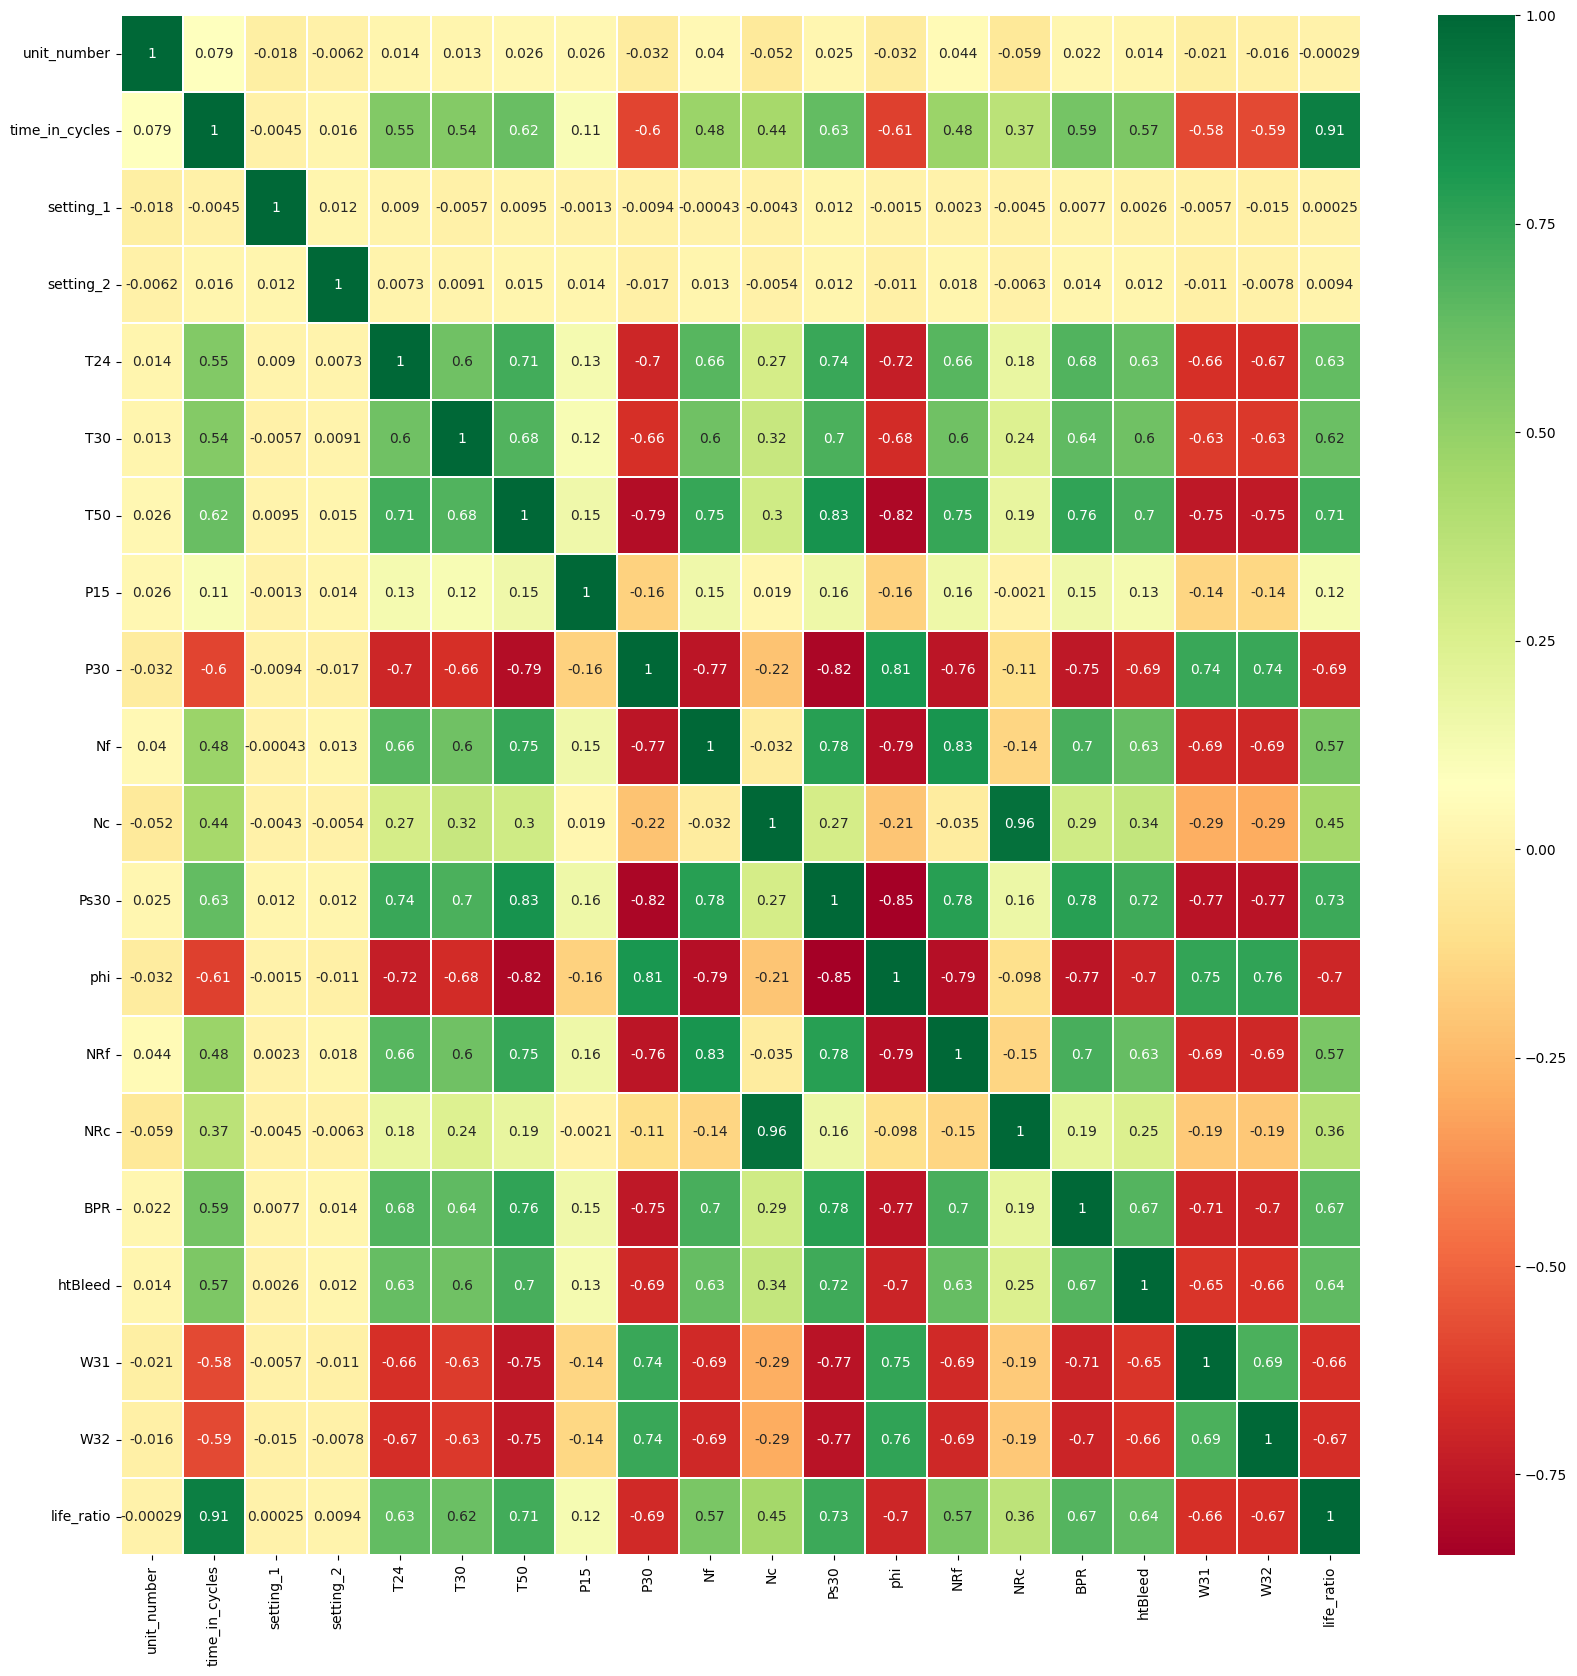

In [ ]:
sns.heatmap(fd_001_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#MODELO NN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

train_data_processed = []
for idx in range(1, 5):
    train_data = pd.read_csv(rf"/content/drive/MyDrive/Colab Notebooks/proyecto DL/DATOS/train_FD00{idx}.txt",sep=" ",header=None)
    train_data.drop(columns=[26,27],inplace=True)

    train_data.columns = columns
    train_data.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)
    train_data['RUL'] =  train_data['time_in_cycles'] / train_data.groupby('unit_number')['time_in_cycles'].transform('max')

    train_data.drop(columns=['unit_number', 'setting_1', 'setting_2'],inplace=True)

    train_data_processed.append(train_data)
    print(f"Processed train_FD00{idx}.txt, number of rows: {train_data.shape[0]}")
train_data_processed = pd.concat(train_data_processed, ignore_index=True)

Processed train_FD001.txt, number of rows: 20631
Processed train_FD002.txt, number of rows: 53759
Processed train_FD003.txt, number of rows: 24720
Processed train_FD004.txt, number of rows: 61249


In [ ]:
test_data_processed = []

for idx in range(1,5):

    test_data_rul = pd.read_csv(rf"/content/drive/MyDrive/Colab Notebooks/proyecto DL/DATOS/RUL_FD00{idx}.txt",sep=" ",header=None)
    test_data = pd.read_csv(rf"/content/drive/MyDrive/Colab Notebooks/proyecto DL/DATOS/test_FD00{idx}.txt",sep=" ",header=None)


    test_data.drop(columns=[26,27],inplace=True)
    columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
            'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

    test_data.columns = columns
    test_data.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)

    eol = []
    for un in test_data['unit_number'].unique():
        temp_data = test_data[test_data['unit_number'] == un]
        eol_temp = test_data_rul.iloc[un-1].values[0]
        eol_temp_list = [eol_temp for i in range(len(temp_data))]

        eol.extend(eol_temp_list)


    test_data['RUL'] = test_data['time_in_cycles'].values / (test_data.groupby('unit_number')['time_in_cycles'].transform('max').values + eol)
    test_data.drop(columns=['unit_number', 'setting_1', 'setting_2'],inplace=True)

    test_data_processed.append(test_data)

    print(f"Processed test_FD00{idx}.txt, number of rows: {test_data.shape[0]}")
test_data_processed = pd.concat(test_data_processed, ignore_index=True)

Processed test_FD001.txt, number of rows: 13096
Processed test_FD002.txt, number of rows: 33991
Processed test_FD003.txt, number of rows: 16596
Processed test_FD004.txt, number of rows: 41214


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
# 1. Dataset class
class RULDataset(Dataset):
    def __init__(self, dataframe):
        self.X = dataframe.drop(columns=["RUL"]).values.astype(np.float32)
        self.y = dataframe["RUL"].values.astype(np.float32).reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx]), torch.tensor(self.y[idx])

# 2. Neural Network model
class RULModel(nn.Module):
    def __init__(self, input_dim):
        super(RULModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(),

            nn.Linear(256, 256),
            nn.LeakyReLU(),

            nn.Linear(256, 256),
            nn.LeakyReLU(),

            nn.Linear(256, 1)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = train_data_processed.drop(columns=['RUL'])
scaled_features = scaler.fit_transform(features)
train_data_processed.loc[:, features.columns] = scaled_features

# Normalize test data using the same scaler
test_features = test_data_processed.drop(columns=['RUL'])
test_scaled_features = scaler.transform(test_features)
test_data_processed.loc[:, test_features.columns] = test_scaled_features

/tmp/ipython-input-1275619669.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.46438155 -1.45241094 -1.44044032 ...  1.55221385  1.56418447
  1.57615508]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data_processed.loc[:, features.columns] = scaled_features
/tmp/ipython-input-1275619669.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.00902172  1.00902172  0.94454996 ...  1.10572936 -0.76395171
 -0.89289524]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data_processed.loc[:, features.columns] = scaled_features
/tmp/ipython-input-1275619669.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.46438155 -1.45241094 -1.44044032 ...  1.86344988  1.8754205
  1.887

In [ ]:
# 4. Dataset & Dataloader
dataset = RULDataset(train_data_processed)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Create TEST Dataset and DataLoader
test_dataset = RULDataset(test_data_processed)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 5. Training Setup
input_dim = train_data_processed.shape[1] - 1  # Exclude RUL
model = RULModel(input_dim).to(device)

# ###########################################################Load the model if it exists
# model.load_state_dict(torch.load("rul_ann_model.pth"))
# model.to(device)
# model.eval()
# ##########################################################

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

def evaluate_model(model, test_loader):
    # 3. Run inference
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            all_preds.append(outputs.cpu().numpy())
            all_targets.append(y_batch.numpy())

    # 4. Calculate MSE
    preds = np.vstack(all_preds)
    targets = np.vstack(all_targets)
    mse = mean_squared_error(targets, preds)
    return mse

In [ ]:
best_mse = float("inf")
best_epoch = -1
epochs = 20

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    val_mse = evaluate_model(model, test_loader)

    # track best mse
    if val_mse < best_mse:
        best_mse = val_mse
        best_epoch = epoch
        torch.save(model.state_dict(), "rul_ann_model.pth")

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(dataloader):.4f}, Test MSE: {val_mse:.4f}")


Epoch [1/20], Loss: 0.0083, Test MSE: 0.0054
Epoch [2/20], Loss: 0.0053, Test MSE: 0.0056
Epoch [3/20], Loss: 0.0051, Test MSE: 0.0056
Epoch [4/20], Loss: 0.0050, Test MSE: 0.0053
Epoch [5/20], Loss: 0.0049, Test MSE: 0.0055
Epoch [6/20], Loss: 0.0048, Test MSE: 0.0051
Epoch [7/20], Loss: 0.0047, Test MSE: 0.0053
Epoch [8/20], Loss: 0.0047, Test MSE: 0.0052
Epoch [9/20], Loss: 0.0047, Test MSE: 0.0055
Epoch [10/20], Loss: 0.0046, Test MSE: 0.0054
Epoch [11/20], Loss: 0.0046, Test MSE: 0.0050
Epoch [12/20], Loss: 0.0046, Test MSE: 0.0051
Epoch [13/20], Loss: 0.0046, Test MSE: 0.0052
Epoch [14/20], Loss: 0.0045, Test MSE: 0.0054
Epoch [15/20], Loss: 0.0045, Test MSE: 0.0050
Epoch [16/20], Loss: 0.0045, Test MSE: 0.0051
Epoch [17/20], Loss: 0.0045, Test MSE: 0.0049
Epoch [18/20], Loss: 0.0045, Test MSE: 0.0050
Epoch [19/20], Loss: 0.0045, Test MSE: 0.0052
Epoch [20/20], Loss: 0.0045, Test MSE: 0.0058


In [ ]:
import torch
import matplotlib.pyplot as plt

# --- Initialize lists to store metrics ---
train_losses = []
val_mses = []

best_mse = float("inf")
best_epoch = -1
epochs = 20

# Assume 'model', 'dataloader', 'test_loader', 'optimizer',
# 'criterion', 'device', and 'evaluate_model' are defined.

for epoch in range(epochs):
    # --- Training Phase ---
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = running_loss / len(dataloader)
    train_losses.append(avg_train_loss) # Store training loss

    # --- Validation Phase ---
    val_mse = evaluate_model(model, test_loader)
    val_mses.append(val_mse) # Store validation MSE

    # track best mse
    if val_mse < best_mse:
        best_mse = val_mse
        best_epoch = epoch
        torch.save(model.state_dict(), "rul_ann_model.pth")

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_train_loss:.4f}, Test MSE: {val_mse:.4f}")

print(f"\nBest Test MSE: {best_mse:.4f} at Epoch {best_epoch+1}")

Epoch [1/20], Loss: 0.0044, Test MSE: 0.0051
Epoch [2/20], Loss: 0.0044, Test MSE: 0.0053
Epoch [3/20], Loss: 0.0044, Test MSE: 0.0051
Epoch [4/20], Loss: 0.0044, Test MSE: 0.0052
Epoch [5/20], Loss: 0.0044, Test MSE: 0.0049
Epoch [6/20], Loss: 0.0044, Test MSE: 0.0051
Epoch [7/20], Loss: 0.0044, Test MSE: 0.0050
Epoch [8/20], Loss: 0.0044, Test MSE: 0.0052
Epoch [9/20], Loss: 0.0044, Test MSE: 0.0052
Epoch [10/20], Loss: 0.0044, Test MSE: 0.0052
Epoch [11/20], Loss: 0.0044, Test MSE: 0.0053
Epoch [12/20], Loss: 0.0044, Test MSE: 0.0049
Epoch [13/20], Loss: 0.0044, Test MSE: 0.0050
Epoch [14/20], Loss: 0.0044, Test MSE: 0.0052
Epoch [15/20], Loss: 0.0044, Test MSE: 0.0051
Epoch [16/20], Loss: 0.0043, Test MSE: 0.0054
Epoch [17/20], Loss: 0.0043, Test MSE: 0.0051
Epoch [18/20], Loss: 0.0043, Test MSE: 0.0049
Epoch [19/20], Loss: 0.0043, Test MSE: 0.0051
Epoch [20/20], Loss: 0.0043, Test MSE: 0.0054

Best Test MSE: 0.0049 at Epoch 12


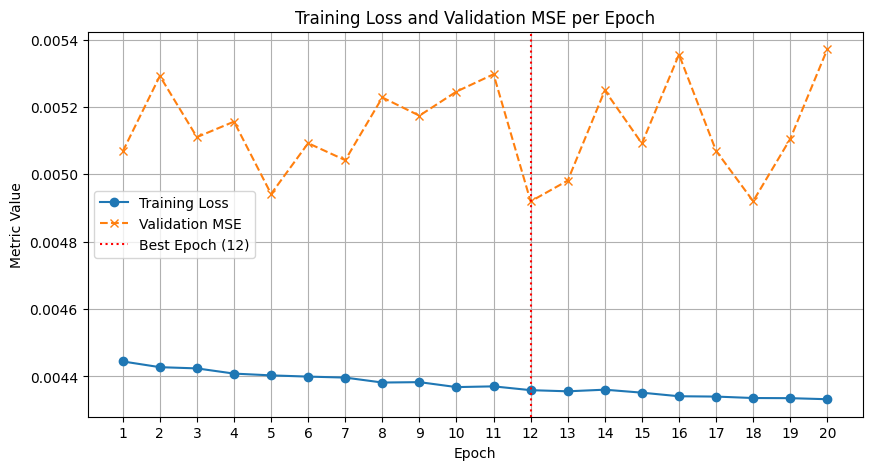

In [ ]:
## Plotting the Training Loss and Validation MSE 📊

# Create an array of epoch numbers for the x-axis
epoch_range = range(1, epochs + 1)

plt.figure(figsize=(10, 5))

# Plot Training Loss
plt.plot(epoch_range, train_losses, label='Training Loss', marker='o', linestyle='-')

# Plot Validation MSE
plt.plot(epoch_range, val_mses, label='Validation MSE', marker='x', linestyle='--')

# Highlight the best epoch
plt.axvline(x=best_epoch + 1, color='r', linestyle=':', label=f'Best Epoch ({best_epoch+1})')

plt.title('Training Loss and Validation MSE per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.xticks(epoch_range) # Ensure all epochs are labeled on the x-axis
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Best MSE achieved: {best_mse:.4f} at epoch {best_epoch + 1}")


Best MSE achieved: 0.0049 at epoch 17


#CNN CON TODOS LOS DATOS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

train_data_processed = []
for idx in range(1, 5):
    train_data = pd.read_csv(rf"/content/drive/MyDrive/Colab Notebooks/proyecto DL/DATOS/train_FD00{idx}.txt",sep=" ",header=None)
    train_data.drop(columns=[26,27],inplace=True)

    train_data.columns = columns
    train_data.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)
    train_data['RUL'] =  train_data['time_in_cycles'] / train_data.groupby('unit_number')['time_in_cycles'].transform('max')

    # train_data.drop(columns=['unit_number', 'setting_1', 'setting_2'],inplace=True)

    train_data_processed.append(train_data)
    print(f"Processed train_FD00{idx}.txt, number of rows: {train_data.shape[0]}")
train_data_processed = pd.concat(train_data_processed, ignore_index=True)

Processed train_FD001.txt, number of rows: 20631
Processed train_FD002.txt, number of rows: 53759
Processed train_FD003.txt, number of rows: 24720
Processed train_FD004.txt, number of rows: 61249


In [ ]:
test_data_processed = []

for idx in range(1,5):

    test_data_rul = pd.read_csv(rf"/content/drive/MyDrive/Colab Notebooks/proyecto DL/DATOS/RUL_FD00{idx}.txt",sep=" ",header=None)
    test_data = pd.read_csv(rf"/content/drive/MyDrive/Colab Notebooks/proyecto DL/DATOS/test_FD00{idx}.txt",sep=" ",header=None)


    test_data.drop(columns=[26,27],inplace=True)
    columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
            'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

    test_data.columns = columns
    test_data.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)

    eol = []
    for un in test_data['unit_number'].unique():
        temp_data = test_data[test_data['unit_number'] == un]
        eol_temp = test_data_rul.iloc[un-1].values[0]
        eol_temp_list = [eol_temp for i in range(len(temp_data))]

        eol.extend(eol_temp_list)


    test_data['RUL'] = test_data['time_in_cycles'].values / (test_data.groupby('unit_number')['time_in_cycles'].transform('max').values + eol)
    # test_data.drop(columns=['unit_number', 'setting_1', 'setting_2'],inplace=True)

    test_data_processed.append(test_data)

    print(f"Processed test_FD00{idx}.txt, number of rows: {test_data.shape[0]}")
test_data_processed = pd.concat(test_data_processed, ignore_index=True)

Processed test_FD001.txt, number of rows: 13096
Processed test_FD002.txt, number of rows: 33991
Processed test_FD003.txt, number of rows: 16596
Processed test_FD004.txt, number of rows: 41214


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# 1. Dataset class
class RULDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

# 2. Neural Network model
class RULCNN2D(nn.Module):
    def __init__(self):
        super(RULCNN2D, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=(3,3), padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),

            nn.Conv2d(64, 64, kernel_size=(3,3), padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),

            nn.Conv2d(64, 64, kernel_size=(3,3), padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),

            nn.AdaptiveAvgPool2d((1, 1))  # Output: (B, 64, 1, 1)
        )

        self.regressor = nn.Sequential(
            nn.Flatten(),        # (B, 64)
            nn.Linear(64,64),
            nn.LeakyReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        # x: (B, 10, 17)
        x = x.unsqueeze(1)       # → (B, 1, 10, 17)
        x = self.cnn(x)          # → (B, 64, 1, 1)
        x = self.regressor(x)    # → (B, 1)
        return x

class RULLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(RULLSTMModel, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.2
        )
        self.bn = nn.BatchNorm1d(hidden_size)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Linear(64, 1)
        )

    def forward(self, x, h0=None, c0=None):  # x: [B, Seq, Features]
        out, (hn, cn) = self.lstm(x)
        out = self.fc(out[:, -1, :])  # [B, 1]
        return out

In [ ]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = train_data_processed.drop(columns=['RUL'])
scaled_features = scaler.fit_transform(features)
train_data_processed.loc[:, features.columns] = scaled_features

# Normalize test data using the same scaler
test_features = test_data_processed.drop(columns=['RUL'])
test_scaled_features = scaler.transform(test_features)
test_data_processed.loc[:, test_features.columns] = test_scaled_features

In [ ]:
from tqdm import tqdm

win_len=10

X_train = []
y_train = []

for unit_number in tqdm(train_data_processed['unit_number'].unique(),leave=False):

    unit_data = train_data_processed[train_data_processed['unit_number'] == unit_number]

    for i in range(0, len(unit_data)-win_len+1):
        temp = unit_data.iloc[i:i+win_len]
        x_temp = temp.drop(columns=['unit_number','RUL'])
        y_temp = temp['RUL'].values[-1]
        X_train.append(x_temp.values)
        y_train.append(y_temp)

X_test = []
y_test = []

for unit_number in tqdm(test_data_processed['unit_number'].unique(),leave=False):

    unit_data = test_data_processed[test_data_processed['unit_number'] == unit_number]

    for i in range(0, len(unit_data)-win_len+1):
        temp = unit_data.iloc[i:i+win_len]
        x_temp = temp.drop(columns=['unit_number','RUL'])
        y_temp = temp['RUL'].values[-1]
        X_test.append(x_temp.values)
        y_test.append(y_temp)

In [ ]:
# 4. Dataset & Dataloader
dataset = RULDataset(X_train,y_train)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Create TEST Dataset and DataLoader
test_dataset = RULDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

win_len = 10 # Number of time steps to consider for each sample
# 5. Training Setup
model = RULCNN2D().to(device)
# model = RULLSTMModel(input_size=17).to(device)

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3)

def evaluate_model(model, test_loader):
    # 3. Run inference
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            all_preds.append(outputs.cpu().numpy())
            all_targets.append(y_batch.cpu().numpy().reshape(-1, 1))

    # 4. Calculate MSE
    preds = np.vstack(all_preds)
    targets = np.vstack(all_targets)
    mse = mean_squared_error(targets, preds)
    return mse


In [ ]:
train_losses = []
test_mses = []
best_mse = float('inf')
best_epoch = -1


In [ ]:
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.view(-1, 1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # compute metrics for this epoch
    epoch_loss = running_loss / len(dataloader)
    epoch_mse = evaluate_model(model, test_loader)

    # store them
    train_losses.append(epoch_loss)
    test_mses.append(epoch_mse)

    # track the best model
    if epoch_mse < best_mse:
        best_mse = epoch_mse
        best_epoch = epoch

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Test MSE: {epoch_mse:.4f}")


Epoch [1/20], Loss: 0.0105, Test MSE: 0.0071
Epoch [2/20], Loss: 0.0058, Test MSE: 0.0078
Epoch [3/20], Loss: 0.0053, Test MSE: 0.0059
Epoch [4/20], Loss: 0.0050, Test MSE: 0.0059
Epoch [5/20], Loss: 0.0048, Test MSE: 0.0054
Epoch [6/20], Loss: 0.0047, Test MSE: 0.0057
Epoch [7/20], Loss: 0.0046, Test MSE: 0.0071
Epoch [8/20], Loss: 0.0046, Test MSE: 0.0057
Epoch [9/20], Loss: 0.0045, Test MSE: 0.0054
Epoch [10/20], Loss: 0.0044, Test MSE: 0.0055
Epoch [11/20], Loss: 0.0044, Test MSE: 0.0062
Epoch [12/20], Loss: 0.0043, Test MSE: 0.0056
Epoch [13/20], Loss: 0.0042, Test MSE: 0.0056
Epoch [14/20], Loss: 0.0042, Test MSE: 0.0054
Epoch [15/20], Loss: 0.0042, Test MSE: 0.0055
Epoch [16/20], Loss: 0.0041, Test MSE: 0.0057
Epoch [17/20], Loss: 0.0041, Test MSE: 0.0055
Epoch [18/20], Loss: 0.0041, Test MSE: 0.0060
Epoch [19/20], Loss: 0.0040, Test MSE: 0.0054
Epoch [20/20], Loss: 0.0040, Test MSE: 0.0072


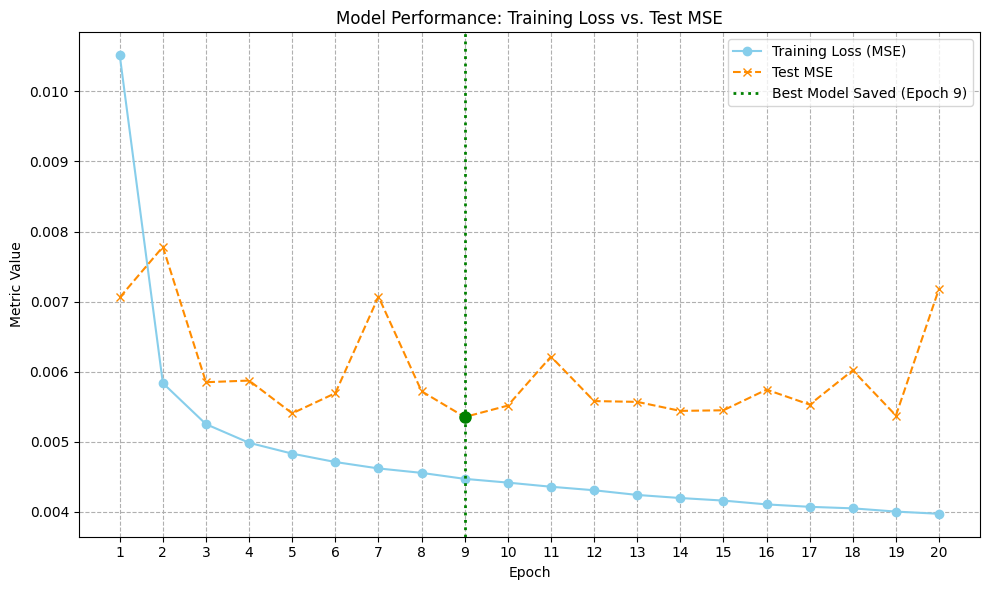

In [ ]:
import matplotlib.pyplot as plt

# --- Ensure these lists are initialized BEFORE the training loop ---
# train_losses = []
# test_mses = []
# best_epoch = -1 # Assuming best_epoch is tracked correctly in your full script

# NOTE: The plotting code below should run *after* your 'for epoch in range(epochs):' loop finishes.

## Plotting the Training Loss and Test MSE 📊

# Create an array of epoch numbers for the x-axis
epochs = 20 # Replace with the actual number of epochs if it changes
epoch_range = range(1, epochs + 1)

plt.figure(figsize=(10, 6))

# Plot Training Loss
plt.plot(epoch_range, train_losses, label='Training Loss (MSE)', color='skyblue', marker='o', linestyle='-')

# Plot Test MSE (Validation Metric)
plt.plot(epoch_range, test_mses, label='Test MSE', color='darkorange', marker='x', linestyle='--')

# Highlight the best epoch (where Test MSE was lowest)
# Only plot if best_epoch was updated (i.e., not -1)
if best_epoch != -1:
    plt.axvline(x=best_epoch + 1, color='green', linestyle=':', linewidth=2, label=f'Best Model Saved (Epoch {best_epoch+1})')
    # Optional: Add a point marker for the best MSE
    plt.plot(best_epoch + 1, test_mses[best_epoch], 'go', markersize=8)


plt.title('Model Performance: Training Loss vs. Test MSE')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')

# Set x-ticks to show every epoch for clarity if 20 or fewer epochs
if epochs <= 20:
    plt.xticks(epoch_range)

plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout() # Adjust plot to make sure everything fits
plt.show()

In [ ]:
print(f"Best MSE: {best_mse:.4f} at epoch {best_epoch+1}")


Best MSE: 0.0054 at epoch 9


#ahora el modelo LSTM

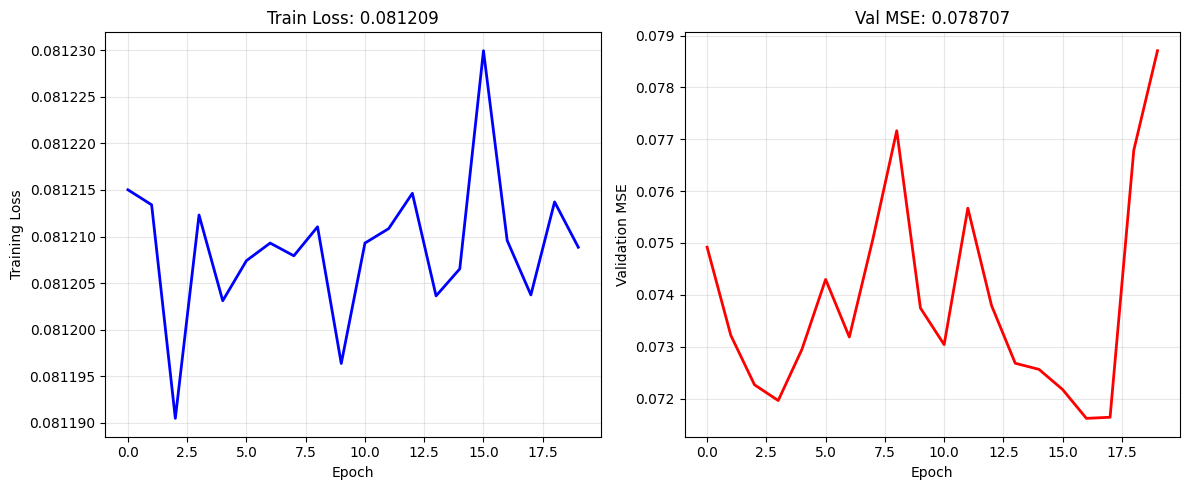

Epoch [20/20]
  Train Loss: 0.081209
  Val MSE: 0.078707
  Best Val MSE: 0.071619 (epoch 17)
--------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
from sklearn.metrics import mean_squared_error
import torch

# Colab-specific setup
plt.figure(figsize=(10, 6))

train_losses = []
val_mses = []
best_mse = float("inf")
best_epoch = -1
epochs = 20

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    batch_count = 0

    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Debug: print batch shapes and sample values
        if epoch == 0 and batch_count == 0:
            print(f"Batch shapes - X: {X_batch.shape}, y: {y_batch.shape}")
            print(f"Sample X values - min: {X_batch.min().item():.4f}, max: {X_batch.max().item():.4f}, mean: {X_batch.mean().item():.4f}")
            print(f"Sample y values - min: {y_batch.min().item():.4f}, max: {y_batch.max().item():.4f}, mean: {y_batch.mean().item():.4f}")

        optimizer.zero_grad()
        outputs = model(X_batch)

        # Debug: print model output range
        if epoch == 0 and batch_count == 0:
            print(f"Model outputs - min: {outputs.min().item():.4f}, max: {outputs.max().item():.4f}, mean: {outputs.mean().item():.4f}")

        loss = criterion(outputs, y_batch)
        loss.backward()

        # Debug: check gradients
        if epoch == 0 and batch_count == 0:
            total_grad_norm = 0
            for name, param in model.named_parameters():
                if param.grad is not None:
                    grad_norm = param.grad.norm().item()
                    total_grad_norm += grad_norm
                    if "weight" in name:
                        print(f"Gradient norm for {name}: {grad_norm:.6f}")
            print(f"Total gradient norm: {total_grad_norm:.6f}")

        optimizer.step()

        running_loss += loss.item()
        batch_count += 1

    avg_train_loss = running_loss / len(dataloader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    preds = []
    targets = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            preds.append(outputs.cpu().numpy())
            targets.append(y_batch.numpy().reshape(-1, 1))

    preds = np.vstack(preds)
    targets = np.vstack(targets)
    val_mse = mean_squared_error(targets, preds)
    val_mses.append(val_mse)

    # Save best model
    if val_mse < best_mse:
        best_mse = val_mse
        best_epoch = epoch
        torch.save(model.state_dict(), "rul_lstm_model.pth")

    # Live plotting
    clear_output(wait=True)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, 'b-', label='Training Loss', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title(f'Train Loss: {avg_train_loss:.6f}')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(val_mses, 'r-', label='Validation MSE', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Validation MSE')
    plt.title(f'Val MSE: {val_mse:.6f}')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Epoch [{epoch+1}/{epochs}]")
    print(f"  Train Loss: {avg_train_loss:.6f}")
    print(f"  Val MSE: {val_mse:.6f}")
    print(f"  Best Val MSE: {best_mse:.6f} (epoch {best_epoch+1})")
    print("-" * 50)

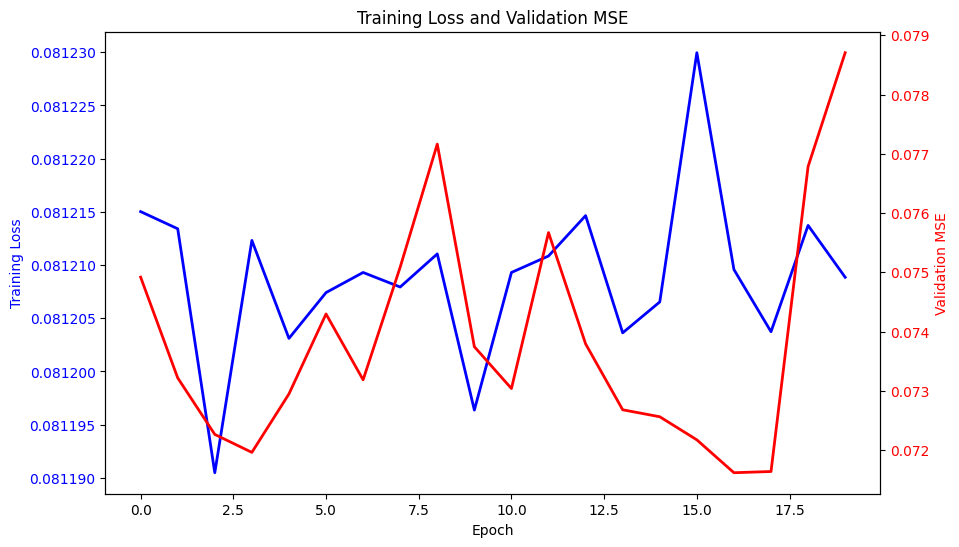

In [ ]:
# In a new cell after training

# If you have the lists in memory, then:

plt.figure(figsize=(10, 6))

# Since training loss and validation MSE might be on different scales, we can use two y-axes.
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(train_losses, 'b-', label='Training Loss', linewidth=2)
ax2.plot(val_mses, 'r-', label='Validation MSE', linewidth=2)

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss', color='b')
ax2.set_ylabel('Validation MSE', color='r')

ax1.tick_params(axis='y', labelcolor='b')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Training Loss and Validation MSE')
plt.show()

PERFORMANCE METRICS COMPARISON


ValueError: Unknown format code 'f' for object of type 'str'


MODEL ARCHITECTURE COMPARISON


,Model,Architecture,Layers,Hidden Units,Activation,Parameters,Window Size,Input Shape,Output Shape
0,Neural Network (ANN),Linear(256)→LeakyReLU→Linear(256)→LeakyReLU→Linear(256)→LeakyReLU→Linear(1),4 Linear,"256, 256, 256",LeakyReLU,"~137,000",None (per-sample),"(batch, 17)","(batch, 1)"
1,CNN (window=10),Conv2D(1→64)→BN→LeakyReLU→Conv2D(64→64)→BN→LeakyReLU→Conv2D(64→64)→BN→LeakyReLU→AdaptiveAvgPool→Flatten→Linear(64→64)→LeakyReLU→Linear(64→1),3 Conv2D + 2 Linear,"64, 64, 64, 64",LeakyReLU,"~79,000",10,"(batch, 1, 10, 17)","(batch, 1)"
2,LSTM,"LSTM(17→64, 2 layers)→BatchNorm→Linear(64→64)→ReLU→BatchNorm→Linear(64→1)",1 LSTM + 2 Linear,"64, 64, 64","ReLU (FC), Tanh/Sigmoid (LSTM)","~58,000",10,"(batch, 10, 17)","(batch, 1)"


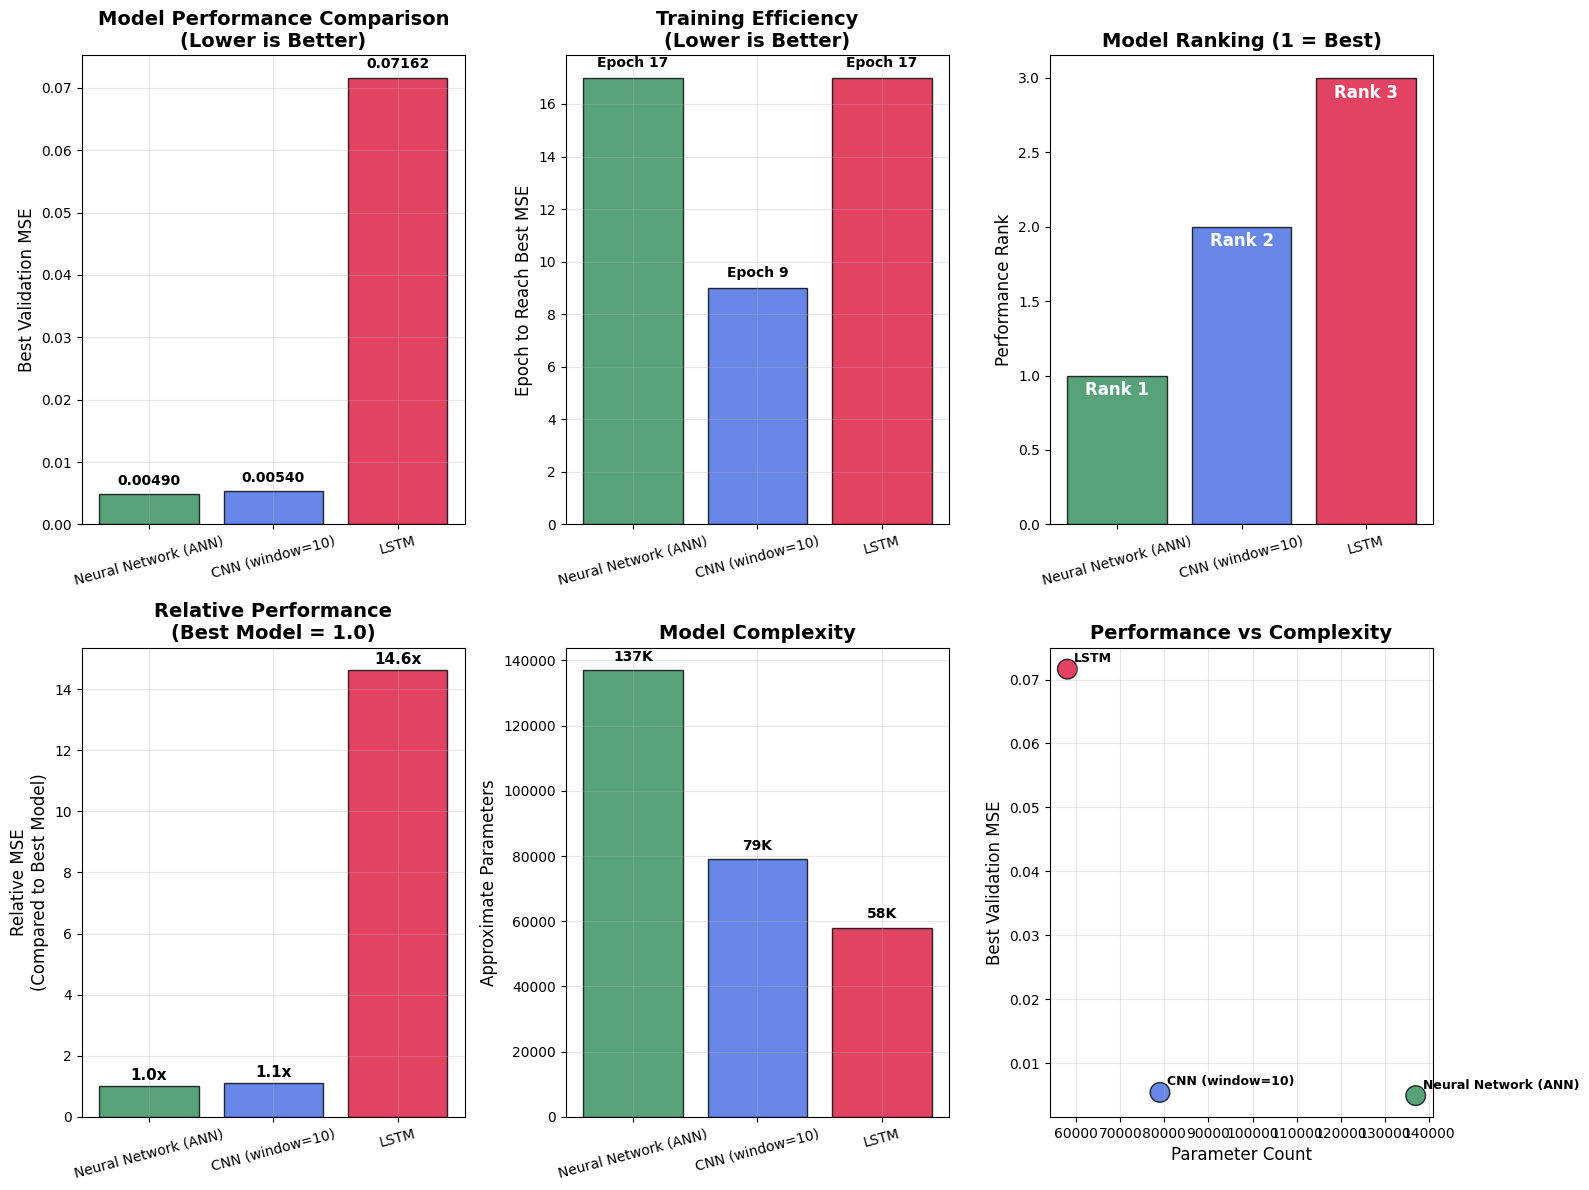


DETAILED ANALYSIS AND INSIGHTS
🏆 BEST PERFORMING MODEL: Neural Network (ANN) with MSE = 0.00490

📊 PERFORMANCE GAPS (compared to best model):
  • Neural Network (ANN): Best performer (reference)
  • CNN (window=10): +10.2% worse than best model
  • LSTM: +1361.6% worse than best model

🎯 KEY OBSERVATIONS:
  1. Neural Network (ANN) achieves the lowest MSE (0.0049)
  2. CNN (window=10) converges fastest (best MSE at epoch 9)
  3. LSTM has significantly higher MSE but uses temporal modeling

💡 ARCHITECTURE INSIGHTS:
  • ANN: Simple feedforward, best performance, no temporal modeling
  • CNN: 2D convolutions, good performance, fast convergence
  • LSTM: Temporal modeling, highest MSE but captures sequence patterns

⚖️ PERFORMANCE-COMPLEXITY TRADEOFF:
  • ANN: Highest performance, medium complexity
  • CNN: Good performance, lowest complexity
  • LSTM: Lower performance, designed for temporal data

📝 RECOMMENDATIONS:
  1. For best accuracy: Use Neural Network (ANN)
  2. For fast training: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics comparison
performance_data = {
    'Model': ['Neural Network (ANN)', 'CNN (window=10)', 'LSTM'],
    'Best Val MSE': [0.0049, 0.0054, 0.071619],
    'Best Epoch': [17, 9, 17],
    'Final Train Loss': ['N/A', 'N/A', 0.081209],
    'Final Val MSE': ['N/A', 'N/A', 0.078707],
    'Total Epochs': [20, 20, 20],
    'Training Time': ['N/A', 'N/A', 'N/A']  # You can fill this if you have timing data
}

performance_df = pd.DataFrame(performance_data)

# Architecture comparison with the details you provided
architecture_data = {
    'Model': ['Neural Network (ANN)', 'CNN (window=10)', 'LSTM'],
    'Architecture': [
        'Linear(256)→LeakyReLU→Linear(256)→LeakyReLU→Linear(256)→LeakyReLU→Linear(1)',
        'Conv2D(1→64)→BN→LeakyReLU→Conv2D(64→64)→BN→LeakyReLU→Conv2D(64→64)→BN→LeakyReLU→AdaptiveAvgPool→Flatten→Linear(64→64)→LeakyReLU→Linear(64→1)',
        'LSTM(17→64, 2 layers)→BatchNorm→Linear(64→64)→ReLU→BatchNorm→Linear(64→1)'
    ],
    'Layers': ['4 Linear', '3 Conv2D + 2 Linear', '1 LSTM + 2 Linear'],
    'Hidden Units': ['256, 256, 256', '64, 64, 64, 64', '64, 64, 64'],
    'Activation': ['LeakyReLU', 'LeakyReLU', 'ReLU (FC), Tanh/Sigmoid (LSTM)'],
    'Parameters': ['~137,000', '~79,000', '~58,000'],  # Approximate counts
    'Window Size': ['None (per-sample)', 10, 10],
    'Input Shape': ['(batch, 17)', '(batch, 1, 10, 17)', '(batch, 10, 17)'],
    'Output Shape': ['(batch, 1)', '(batch, 1)', '(batch, 1)']
}

architecture_df = pd.DataFrame(architecture_data)

# Display the tables with styling
print("="*100)
print("PERFORMANCE METRICS COMPARISON")
print("="*100)

# Style the performance table
styled_performance = performance_df.style\
    .format({'Best Val MSE': '{:.5f}', 'Final Val MSE': '{:.5f}', 'Final Train Loss': '{:.5f}'})\
    .background_gradient(subset=['Best Val MSE'], cmap='RdYlGn_r')\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#40466e'), ('color', 'white'),
                 ('font-weight', 'bold'), ('text-align', 'center')]
    }])

display(styled_performance)

print("\n" + "="*100)
print("MODEL ARCHITECTURE COMPARISON")
print("="*100)

# Style the architecture table
styled_architecture = architecture_df.style\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#40466e'), ('color', 'white'),
                 ('font-weight', 'bold'), ('text-align', 'center')]
    }, {
        'selector': 'td',
        'props': [('max-width', '300px'), ('word-wrap', 'break-word')]
    }])

display(styled_architecture)

# Create comprehensive visualizations
plt.figure(figsize=(16, 12))

# Color scheme
colors = ['#2E8B57', '#4169E1', '#DC143C']  # Green, Blue, Red

# 1. Main performance comparison
plt.subplot(2, 3, 1)
models = performance_df['Model']
mse_values = performance_df['Best Val MSE']

bars = plt.bar(models, mse_values, color=colors, alpha=0.8, edgecolor='black')
plt.ylabel('Best Validation MSE', fontsize=12)
plt.title('Model Performance Comparison\n(Lower is Better)', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{value:.5f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Training efficiency (epochs to best performance)
plt.subplot(2, 3, 2)
epoch_values = performance_df['Best Epoch']
bars = plt.bar(models, epoch_values, color=colors, alpha=0.8, edgecolor='black')
plt.ylabel('Epoch to Reach Best MSE', fontsize=12)
plt.title('Training Efficiency\n(Lower is Better)', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3)

for bar, value in zip(bars, epoch_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'Epoch {value}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 3. Performance ranking
plt.subplot(2, 3, 3)
ranking = [1, 2, 3]  # Based on MSE values
plt.bar(models, ranking, color=colors, alpha=0.8, edgecolor='black')
plt.ylabel('Performance Rank', fontsize=12)
plt.title('Model Ranking (1 = Best)', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
for i, (model, rank) in enumerate(zip(models, ranking)):
    plt.text(i, rank - 0.1, f'Rank {rank}', ha='center', va='center',
             fontweight='bold', color='white', fontsize=12)

# 4. Relative performance comparison
plt.subplot(2, 3, 4)
best_mse = min(mse_values)
relative_performance = [mse / best_mse for mse in mse_values]
bars = plt.bar(models, relative_performance, color=colors, alpha=0.8, edgecolor='black')
plt.ylabel('Relative MSE\n(Compared to Best Model)', fontsize=12)
plt.title('Relative Performance\n(Best Model = 1.0)', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3)

for i, (model, rel_perf) in enumerate(zip(models, relative_performance)):
    plt.text(i, rel_perf + 0.1, f'{rel_perf:.1f}x', ha='center', va='bottom',
             fontweight='bold', fontsize=11)

# 5. Model complexity (approximate parameter count)
plt.subplot(2, 3, 5)
param_counts = [137000, 79000, 58000]  # Approximate parameter counts
bars = plt.bar(models, param_counts, color=colors, alpha=0.8, edgecolor='black')
plt.ylabel('Approximate Parameters', fontsize=12)
plt.title('Model Complexity', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3)

for bar, count in zip(bars, param_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2000,
             f'{count/1000:.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 6. Performance vs Complexity scatter
plt.subplot(2, 3, 6)
scatter = plt.scatter(param_counts, mse_values, s=200, c=colors, alpha=0.8, edgecolors='black')
plt.xlabel('Parameter Count', fontsize=12)
plt.ylabel('Best Validation MSE', fontsize=12)
plt.title('Performance vs Complexity', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add model labels to scatter points
for i, (model, param, mse) in enumerate(zip(models, param_counts, mse_values)):
    plt.annotate(model, (param, mse), xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed analysis and insights
print("\n" + "="*100)
print("DETAILED ANALYSIS AND INSIGHTS")
print("="*100)

best_model_idx = performance_df['Best Val MSE'].idxmin()
best_model = performance_df.loc[best_model_idx, 'Model']
best_mse = performance_df.loc[best_model_idx, 'Best Val MSE']

print(f"🏆 BEST PERFORMING MODEL: {best_model} with MSE = {best_mse:.5f}")
print()

# Performance gap analysis
print("📊 PERFORMANCE GAPS (compared to best model):")
for idx, row in performance_df.iterrows():
    improvement = ((row['Best Val MSE'] - best_mse) / best_mse) * 100
    if idx != best_model_idx:
        print(f"  • {row['Model']}: {improvement:+.1f}% worse than best model")
    else:
        print(f"  • {row['Model']}: Best performer (reference)")

print(f"\n🎯 KEY OBSERVATIONS:")
print(f"  1. {performance_df.loc[0, 'Model']} achieves the lowest MSE (0.0049)")
print(f"  2. {performance_df.loc[1, 'Model']} converges fastest (best MSE at epoch 9)")
print(f"  3. {performance_df.loc[2, 'Model']} has significantly higher MSE but uses temporal modeling")

print(f"\n💡 ARCHITECTURE INSIGHTS:")
print(f"  • ANN: Simple feedforward, best performance, no temporal modeling")
print(f"  • CNN: 2D convolutions, good performance, fast convergence")
print(f"  • LSTM: Temporal modeling, highest MSE but captures sequence patterns")

print(f"\n⚖️ PERFORMANCE-COMPLEXITY TRADEOFF:")
print(f"  • ANN: Highest performance, medium complexity")
print(f"  • CNN: Good performance, lowest complexity")
print(f"  • LSTM: Lower performance, designed for temporal data")

# Recommendations
print(f"\n📝 RECOMMENDATIONS:")
print(f"  1. For best accuracy: Use {best_model}")
print(f"  2. For fast training: Use CNN (converges in 9 epochs)")
print(f"  3. For temporal data modeling: Consider LSTM despite higher MSE")
print(f"  4. Consider ensemble approaches combining these architectures")